In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats

In [21]:
ticker = "NVDA"

In [3]:
# read CSV
stock_data = pd.read_csv("NVDA_1D.csv")

In [7]:
print(stock_data.head())

        date        open        high         low       close        MA21  \
0  14/3/2025  118.610000  121.880000  118.150000  121.670000  120.674510   
1  13/3/2025  117.030000  117.760000  113.790000  115.580000  120.574961   
2  12/3/2025  114.120000  116.760000  112.880000  115.740000  121.074457   
3  11/3/2025  106.980162  112.225680  104.760366  108.750000  121.607903   
4  10/3/2025  109.889895  111.839715  105.450303  106.970163  122.893693   

         MA60       MA200     Volume        RSI  
0  127.598933  120.969983  277593455  49.330691  
1  127.799914  120.962948  299033131  43.473716  
2  128.214149  121.017048  323857454  43.596658  
3  128.637001  121.070084  354865692  36.287449  
4  129.311137  121.193904  366487363  34.273616  


In [9]:
print(stock_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1810 non-null   object 
 1   open    1810 non-null   float64
 2   high    1810 non-null   float64
 3   low     1810 non-null   float64
 4   close   1810 non-null   float64
 5   MA21    1810 non-null   float64
 6   MA60    1810 non-null   float64
 7   MA200   1810 non-null   float64
 8   Volume  1810 non-null   int64  
 9   RSI     1810 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 141.5+ KB
None


In [11]:
# convert formt Datetime
stock_data['date'] = pd.to_datetime(stock_data['date'], format='%d/%m/%Y')

In [13]:
# Calculate Daily Returns
stock_data['Daily_Return'] = stock_data['close'].pct_change() * 100

In [15]:
daily_returns = stock_data['Daily_Return'].dropna()

In [23]:
# Compute Statistical Measures
mean_return = daily_returns.mean()
std_return = daily_returns.std()

print(f"mean_return {ticker}: {mean_return:.2f}%")
print(f"std_return: {std_return:.2f}%")

mean_return NVDA: -0.12%
std_return: 3.30%


In [25]:
# Calculate 95% Confidence Interval
lower_bound = mean_return - 2 * std_return
upper_bound = mean_return + 2 * std_return
print(f"95% Confidence Interval: [{lower_bound:.2f}%, {upper_bound:.2f}%]")

95% Confidence Interval: [-6.73%, 6.48%]


In [29]:
# Probability of a Daily Gain Greater Than 2%
prob_increase_2pct = 1 - stats.norm.cdf(2, mean_return, std_return)
print(f"Probability of {ticker} Daily Gain Greater Than 2%: {prob_increase_2pct:.2f} or {prob_increase_2pct*100:.2f}%")

Probability of NVDA Daily Gain Greater Than 2%: 0.26 or 26.01%


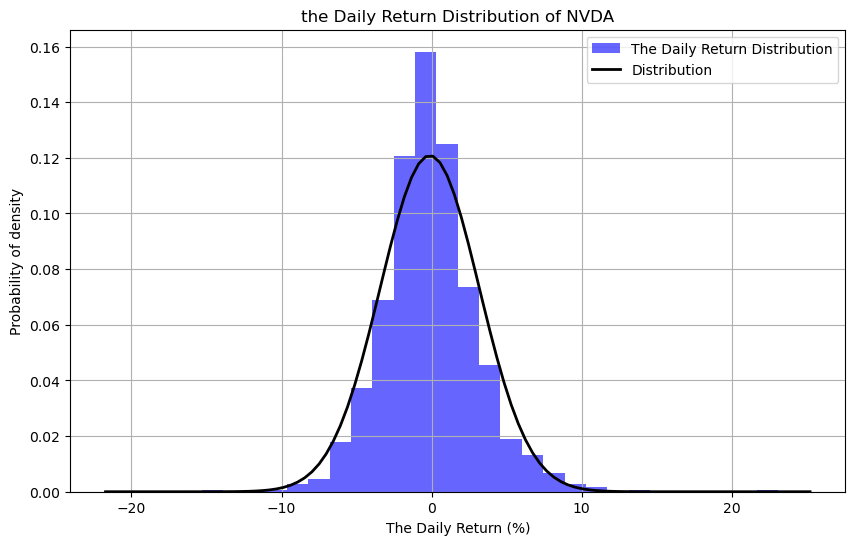

In [37]:
# Histogram Plot
plt.figure(figsize=(10, 6))
plt.hist(daily_returns, bins=30, density=True, alpha=0.6, color='blue', label='The Daily Return Distribution')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_return, std_return)
plt.plot(x, p, 'k', linewidth=2, label='Distribution')

plt.title(f'the Daily Return Distribution of {ticker}')
plt.xlabel('The Daily Return (%)')
plt.ylabel('Probability of density')
plt.legend()
plt.grid(True)
plt.show()